In [1]:
###########################################
#   Setup standard analysis environment   # 
###########################################

import os, sys
from math import *

import pandas
import numpy as np
np.set_printoptions(threshold=18)#np.inf)

import scipy
import scipy.integrate as spi
from scipy import stats

# Plotting modules
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')
%matplotlib inline

# LaTeX rendering in plots 
#from matplotlib import rc
#rc('text', usetex=True)
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [2]:
# function to calculate acceleration due to magnetic force

def a_mag(q,m,v,b):
  c = q/m
  f = c * np.cross(v,b)
  return f  

In [3]:
# configure stepping parameters

n_max = 1
n_step = 1e-6
steps = int(n_max/n_step)

# set up time array
t = np.linspace(0, n_max, num=steps, endpoint=True) # [s]

# initialize s(t) and v(t) arrays
s = np.empty([steps,3]) # [m]
v = np.empty([steps,3]) # [m]
a = np.empty([steps,3]) # [m]

# values, initial conditions
q = 1.602e-19 # [C]
m = 1.672e-27 # [kg]
b = np.array([0,0,-1e-6]) # [T]

s[0] = [0,0,0]
v[0] = [2,0,0]
a[0] = a_mag(q,m,v[0],b)

In [4]:
for i in range(1,t.size):
  s[i] = s[i-1] + v[i-1]*n_step
  
  v[i] = v[i-1] + a[i-1]*n_step
  
  a[i] = a_mag(q,m,v[i-1],b)

Text(0, 0.5, 'y')

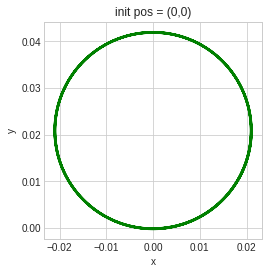

In [25]:
ax = plt.gca()
ax.set_aspect(1)
plt.plot(s[:,0],s[:,1],'g')
plt.title('init pos = (0,0)')
plt.xlabel('x')
plt.ylabel('y')